# Stabilité d'un tri

Nous utilisons le tri à bulles pour illustrer une propriété importante des tris: la **stabilité**. 

Cette propriété s'intéresse à ce qu'il se passe lorsque l'algorithme de tri rencontre **deux éléments qu'il considère comme de même valeur**. <BR>

Cette propriété n'est évidemment intéressante que si deux éléments objectivement différents sont considérés égaux par le tri. C'est par exemple le cas quand on n'utilise qu'une partie de l'information pour trier. Considérons par exemple la liste suivante de noms et prénoms 

In [1]:
TAB = []
TAB.append( ("Aubert","Beatrice") )
TAB.append( ("Caron","Alain") )
TAB.append( ("Bonnet","Christine") )
TAB.append( ("Bonnet","Anne") )
TAB.append( ("Aubert","Alexandre") )
TAB.append( ("Caron","Catherine") )
TAB.append( ("Bonnet","Benoit") )
TAB.append( ("Aubert","Denis") )
TAB.append( ("Aubert","Carole") )
TAB.append( ("Caron","Brigitte") )

On peut envisager de trier cette liste par nom de famille, par prénom, par nom/prénom ou par prénom/nom, ... 

Pour mieux visualiser ces tris, écrivons la fonction d'affichage suivante.

In [2]:
def afficher(T):
    
    print("{:>10}".format("Nom"),"|","{:>10}".format("Prénom"))
    print("-----------+-----------")
    for nom,prenom in T:
         print("{:>10}".format(nom),"|","{:>10}".format(prenom))


afficher(TAB)

       Nom |     Prénom
-----------+-----------
    Aubert |   Beatrice
     Caron |      Alain
    Bonnet |  Christine
    Bonnet |       Anne
    Aubert |  Alexandre
     Caron |  Catherine
    Bonnet |     Benoit
    Aubert |      Denis
    Aubert |     Carole
     Caron |   Brigitte


Pour le rendre plus générique, réécrivons notre tri à bulles avec une fonction de comparaison `plus_petit` passée en paramètre 

Cette fonction doit prendre deux éléments en paramètres et renvoyer `True` si le premier est plus petit que le second et `False` sinon. La foncton `tri_a_bulles` trie alors le tableau `T` par ordre croissant. 

In [3]:
def tri_a_bulles(T,plus_petit):

    N = len(T)
    for k in range(N,1,-1): 
        for i in range(0,k-1):
            if plus_petit( T[i+1], T[i] ):
                T[i],T[i+1] = T[i+1],T[i]   

Ainsi, si l'on veut trier la liste par ordre alphabétique des prénoms, il suffit d'écrire une fonction de comparaison ne prenant en compte que ceux-ci. 

In [4]:
def compare_prenoms(a,b):
    return a[1] < b[1]

Visualisons-en le résultat

In [5]:
T1 = TAB.copy()
tri_a_bulles(T1,compare_prenoms)
afficher(T1)

       Nom |     Prénom
-----------+-----------
     Caron |      Alain
    Aubert |  Alexandre
    Bonnet |       Anne
    Aubert |   Beatrice
    Bonnet |     Benoit
     Caron |   Brigitte
    Aubert |     Carole
     Caron |  Catherine
    Bonnet |  Christine
    Aubert |      Denis


De même, pour trier selon l'ordre alphabétique des noms, il suffit d'utiliser la fonction de comparaison suivante

In [6]:
def compare_noms(a,b):
    return a[0] < b[0]

Ce tri, appliqué à la liste originale, donne 

In [7]:
T2 = TAB.copy()
tri_a_bulles(T2,compare_noms)
afficher(T2)

       Nom |     Prénom
-----------+-----------
    Aubert |   Beatrice
    Aubert |  Alexandre
    Aubert |      Denis
    Aubert |     Carole
    Bonnet |  Christine
    Bonnet |       Anne
    Bonnet |     Benoit
     Caron |      Alain
     Caron |  Catherine
     Caron |   Brigitte


Mais appliquons maintenant le tri par nom de famille à la liste T1 que l'on a précédemment triée par prénom. 

In [8]:
T3 = T1.copy()
tri_a_bulles(T3,compare_noms)
afficher(T3)

       Nom |     Prénom
-----------+-----------
    Aubert |  Alexandre
    Aubert |   Beatrice
    Aubert |     Carole
    Aubert |      Denis
    Bonnet |       Anne
    Bonnet |     Benoit
    Bonnet |  Christine
     Caron |      Alain
     Caron |   Brigitte
     Caron |  Catherine


On note alors que - pour chaque nom de famille - les personnes sont maintenant triées par ordre alphabétique des prénoms

Plus exactement, lors du tri par nom de famille, les personnes qui ont le même nom de famille restent listées dans le même ordre qu'elles avaient avant ce tri. La liste ayant été préalablement triée par prénom, elle le reste pour chaque nom de famille. 

C'est la définition de la stabilité: 

**Un algorithme de tri est stable s'il ne modifie pas l'ordre initial des clés identiques**. <BR> 

## Déstabiliser un tri stable

Notons qu'il est assez simple de déstabiliser un tri. 

Dans l'algoritme du tri à bulle, remplaçons simplement `if plus_petit( T[i+1], T[i] )` par `if not plus_petit( T[i], T[i+1] ):`. 

Donc, nous remplaçons le test $A > B$ par $\neg( B > A )$, ce qui est équivalent à $A \geq B$. 

In [9]:
def tri_instable(T,plus_petit):

    N = len(T)
    for k in range(N,1,-1): 
        for i in range(0,k-1):
            if not plus_petit( T[i], T[i+1] ):
                T[i],T[i+1] = T[i+1],T[i]  

Cela change uniquement le traitement des éléments égaux selon le critère de tri. Ils seront maintenant swappés alors qu'ils ne l'étaient pas. Cela rend le tri résultant instable, comme nous pouvons l'illustrer en triant par nom de famille la liste T1 triée par prénom.

In [10]:
T4 = T1.copy()
tri_instable(T4,compare_noms)
afficher(T4)

       Nom |     Prénom
-----------+-----------
    Aubert |      Denis
    Aubert |   Beatrice
    Aubert |  Alexandre
    Aubert |     Carole
    Bonnet |  Christine
    Bonnet |     Benoit
    Bonnet |       Anne
     Caron |  Catherine
     Caron |   Brigitte
     Caron |      Alain


Il est également possible de déstabiliser la fonction `tri_a_bulles` sans la modifier mais en lui fournissant en paramètre une mauvaise fonction de comparaison. 

In [11]:
def compare_noms_instable(a,b):
    return a[0] <= b[0]

T5 = T1.copy()
tri_a_bulles(T5,compare_noms_instable)
afficher(T5)

       Nom |     Prénom
-----------+-----------
    Aubert |      Denis
    Aubert |   Beatrice
    Aubert |  Alexandre
    Aubert |     Carole
    Bonnet |  Christine
    Bonnet |     Benoit
    Bonnet |       Anne
     Caron |  Catherine
     Caron |   Brigitte
     Caron |      Alain


Notons que quand une librairie vous fournit une fonction de tri stable générique, le tri en question n'est donc stable que si vous mettez correctement en oeuvre la fonction de comparaison avec une inégalité stricte. C'est pas exemple le cas en C++ avec la fonction [std::stable_sort](http://www.cplusplus.com/reference/algorithm/stable_sort/)

## Stabiliser un tri instable

De même, il est toujours possible de stabiliser un algorithme de tri instable en procédant en trois étapes.

* Ajouter un indice 

In [12]:
def ajoute_indice(T):
    return [ (nom, prenom, indice) for indice, ( nom, prenom ) in enumerate(T)]

T6 = ajoute_indice(T1)
print(T6)

[('Caron', 'Alain', 0), ('Aubert', 'Alexandre', 1), ('Bonnet', 'Anne', 2), ('Aubert', 'Beatrice', 3), ('Bonnet', 'Benoit', 4), ('Caron', 'Brigitte', 5), ('Aubert', 'Carole', 6), ('Caron', 'Catherine', 7), ('Bonnet', 'Christine', 8), ('Aubert', 'Denis', 9)]


* Trier en utilisant l'indice pour différencier les éléments égaux par ailleurs. Les indices étant uniques, il n'y a aucun cas d'égalité lors du tri et l'instabilité de l'algorithme n'a donc aucune incidence.

In [13]:
def compare_noms_indices(a,b):
    (nom_a, prenom_a, indice_a) = a;
    (nom_b, prenom_b, indice_b) = b;
    if(nom_a < nom_b):
        return True
    elif nom_a == nom_b:
        return indice_a < indice_b
    else:
        return False
    
tri_instable(T6,compare_noms_indices)

print(T6)

[('Aubert', 'Alexandre', 1), ('Aubert', 'Beatrice', 3), ('Aubert', 'Carole', 6), ('Aubert', 'Denis', 9), ('Bonnet', 'Anne', 2), ('Bonnet', 'Benoit', 4), ('Bonnet', 'Christine', 8), ('Caron', 'Alain', 0), ('Caron', 'Brigitte', 5), ('Caron', 'Catherine', 7)]


* Oter l'indice des éléments triés

In [14]:
def retire_indice(T):
    return [ (nom, prenom) for (nom, prenom, indice) in T ]

T6 = retire_indice(T6)

afficher(T6)

       Nom |     Prénom
-----------+-----------
    Aubert |  Alexandre
    Aubert |   Beatrice
    Aubert |     Carole
    Aubert |      Denis
    Bonnet |       Anne
    Bonnet |     Benoit
    Bonnet |  Christine
     Caron |      Alain
     Caron |   Brigitte
     Caron |  Catherine


Cette technique est couramment utilisée en C, langage dont la librairie standard ne fournit par défaut qu'un tri instable avec [qsort](http://www.cplusplus.com/reference/cstdlib/qsort/)

# Visualisation

Pour analyser la stabilité des tris suivants, nous utiliserons une technique plus visuelle. Elle consiste à trier une liste de 50 nombres réels aléatoires entre 0 et 7 avec trois critères de tris distincts qui comparent

* les nombres originaux
* leurs parties entières 
* leurs parties fractionnaires

In [15]:
import numpy as np

def comp(a,b):
    return a<b

def comp_int(a,b):
    return int(a) < int(b)

def comp_frac(a,b):
    return (a-int(a)) < (b - int(b))

Visualisons le tri de 50 nombres aléatoires 

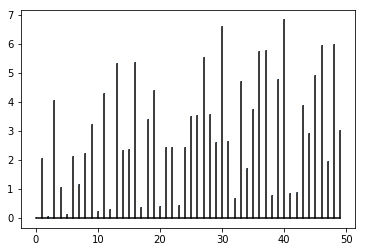

In [22]:
def comp_frac(a,b):
    return (a-int(a)) < (b - int(b))

import matplotlib
import matplotlib.pyplot as plt
   
T = np.random.uniform(0,7,50)
tri_a_bulles(T,comp_frac)
plt.stem(T,markerfmt=',',linefmt='black',basefmt='black')
plt.show()

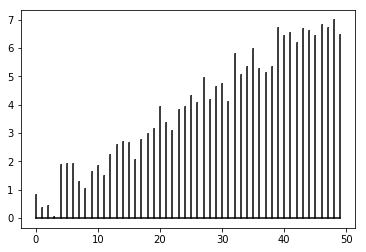

In [23]:
def comp_int(a,b):
    return int(a) < int(b)

import matplotlib
import matplotlib.pyplot as plt
   
T = np.random.uniform(0,7,50)
tri_a_bulles(T,comp_int)
plt.stem(T,markerfmt=',',linefmt='black',basefmt='black')
plt.show()

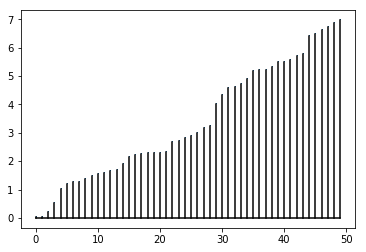

In [24]:
import matplotlib
import matplotlib.pyplot as plt
   
T = np.random.uniform(0,7,50)
tri_a_bulles(T,comp_frac)
tri_a_bulles(T,comp_int)
plt.stem(T,markerfmt=',',linefmt='black',basefmt='black')
plt.show()

Avec un tri stable, trier selon les parties fractionnaires puis entières est équivalent à trier selon les nombres originaux. Pour un tri instable, il est excessivement peu probable que ce soit le cas. 

La fonction `test_stabilite` suivante affiche le résultat de ce double tri et indique si le tri est stable. Elle sera utilisée sans autre explication pour les tris suivants de ce chapitre. 

In [25]:
import matplotlib
import matplotlib.pyplot as plt
   
def test_stabilite(algorithme):
    T = np.random.uniform(0,7,50)
    T2 = T.copy()
    N = len(T)
    
    algorithme(T,comp_frac)
    algorithme(T,comp_int)

    algorithme(T2,comp)
    
    if (T == T2).all():
        print("\nLe tri est stable")
    else:
        print("\nLe tri n'est pas stable")
        
    plt.stem(T,markerfmt=',',linefmt='black',basefmt='black')
    plt.show()

Pour tester la stabilité du tri à bulles, il suffit d'écrire 


Le tri est stable


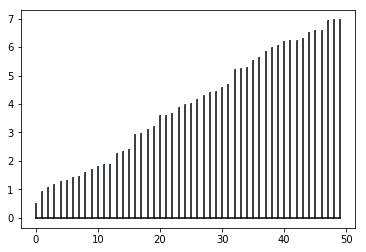

In [26]:
test_stabilite(tri_a_bulles)

Par contre, avec la la version instable obtenue en remplaçant `plus_petit( T[i+1], T[i] )` par `not plus_petit( T[i], T[i+1] )`, on obtient 


Le tri n'est pas stable


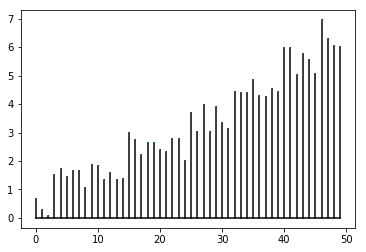

In [27]:
test_stabilite(tri_instable)

Cette fonction `test_stabilite` sera importée pour la suite d'un fichier annexe pour les tris suivant. Elle prend en paramètre une version générique du tri dont le deuxième argument définit la fonction `plus_petit`

[ASD1 Notebooks on GitHub.io](https://ocuisenaire.github.io/ASD1-notebooks/)

© Olivier Cuisenaire, 2018